In [18]:
from matplotlib import pyplot as plt

In [19]:
from loadingCGAN.cgan import Cgan, switching_gans
from loadingCGAN.mlp import Mlp
from evaluation.evaluation import evaluate
from learning import learning
import numpy as np
from load_data.load_data import load_data
from utils.config import epochs, number_of_gans, switches, latent_dim, nrows, dropout, leaky_relu
from utils.config import examples, reload_images_p, show_past_p, smooth_zero, smooth_one

In [23]:
number_of_gans = 2

In [24]:
# DATA
x_train, x_train_cv, y_train, y_train_cv, x_balanced_train, y_balanced_train, x_test, y_test = load_data(place="home",
                                                                                                         verbose=False,
                                                                                                         nrows=nrows,
                                                                                                         cv_size=.1,
                                                                                                         log_transform=True)
data_dim = x_train.shape[1]

/Users/ppx/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/ppx/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [25]:
########
# CGAN #
########
cgans = [Cgan(data_dim=data_dim, latent_dim=latent_dim,
              spectral_normalisation=False,
              weight_clipping=False, verbose=False,
              activation="tanh", dropout=dropout, leaky_relu=leaky_relu) for _ in range(number_of_gans)]

/Users/ppx/Desktop/gitELECOM/cGANoDEbergerac/loadingCGAN/cgan.py:114: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=50, kernel_initializer=<keras.ini..., kernel_constraint=None)`
  model.add(Dropout(self.dropout))
/Users/ppx/Desktop/gitELECOM/cGANoDEbergerac/loadingCGAN/cgan.py:120: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, kernel_initializer=<keras.ini..., kernel_constraint=None)`
  print("\n \n Generator Architecture ")
/Users/ppx/Desktop/gitELECOM/cGANoDEbergerac/loadingCGAN/cgan.py:126: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(116, kernel_initializer=<keras.ini..., kernel_constraint=None)`
  model_input = multiply([noise, label_embedding])


In [26]:
cgans = learning(cgans=cgans, x=x_balanced_train, y=y_balanced_train, x_cv=x_train_cv,
                 y_cv=y_train_cv, number_of_gans=number_of_gans,
                 epochs=epochs, switches=switches, print_mode=False, mode_d_loss=False,
                 reload_images_p=reload_images_p, show_past_p=show_past_p,
                 smooth_zero=smooth_zero, smooth_one=smooth_one)


100%|██████████| 12/12 [02:08<00:00, 10.09s/it]

100%|██████████| 12/12 [01:48<00:00,  5.70s/it]


Let's switch the GANs
There are 0 fixed points
GANs switched


/Users/ppx/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ppx/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1000/1000 [==============================] - 1s 570us/step
Let's switch the GANs
There are 0 fixed points
GANs switched
1000/1000 [==============================] - 1s 602us/step
Let's switch the GANs
There are 0 fixed points
GANs switched
1000/1000 [==============================] - 1s 654us/step
Let's switch the GANs
There are 2 fixed points
GANs switched
1000/1000 [==============================] - 1s 646us/step



best generator loss is 0.3304076791031128



f1 score is 0.6774756916581769
f1 score is 0.6839197122887389
{'confusion_matrix': array([[529,   0],
       [471,   0]]), 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0, 'accuracy': 0.529}


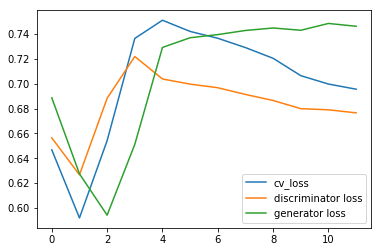

True

In [27]:
cgan = cgans[0]
cgan.plot_learning()

In [31]:
predictions = list(cgan.predict_proba(x=x_test))

In [34]:
y_test

array([0., 0., 1., ..., 0., 1., 1.])

In [36]:
ypred = [float(x>np.mean(predictions)) for x in predictions]

In [29]:
number = 100
labels = [i%2 for i in range(100)]
cgan.generate(self, number=number, labels)

SyntaxError: positional argument follows keyword argument (<ipython-input-29-63dd999be122>, line 3)

In [37]:
result_cgan = evaluate(y_true=y_test, y_pred=ypred)

In [38]:
result_cgan

{'accuracy': 0.5135, 'confusion_matrix': array([[3412, 1880],
        [2985, 1723]]), 'f1_score': 0.4146312116472145, 'precision': 0.4782126006106023, 'recall': 0.36597281223449446}

In [2]:
attack_mode = None
epochs = 25
number_of_gans = 3
switches = 5
examples = 100
reload_images_p = .93
show_past_p = .92
smooth_zero = .1
smooth_one = .9
latent_dim = 50


In [3]:
# DATA
x_train, x_train_cv, y_train, y_train_cv, x_balanced_train, y_balanced_train, x_test, y_test = load_data(place="home",
                                                                                                         cv_size=.1,
                                                                                                         log_transform=True)
data_dim = x_train.shape[1]

/Users/ppx/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/ppx/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train data shape is (125973, 122)
Test data shape is (125973, 122)

  
 
 
  
 
 
Train data shape is (117260, 122)

  
 
 
  
 
 
x_train overview
   0         1         2    3    4    5    6    7    8    9   ...   112  113  \
0 -1.0 -0.410940 -1.000000 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 ...  -1.0 -1.0   
1 -1.0 -0.525744 -1.000000 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 ...  -1.0 -1.0   
2 -1.0 -1.000000 -1.000000 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 ...  -1.0 -1.0   
3 -1.0 -0.481972 -0.141985 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 ...  -1.0 -1.0   
4 -1.0 -0.496485 -0.424326 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 ...  -1.0 -1.0   

   114  115  116  117  118  119  120  121  
0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
1 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
2 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
3 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
4 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  

[5 rows x 122 columns]

  
 
 
  
 
 
y_train overview
     0
0  0.0
1  0.0
2  1.0
3  0.0
4  0.0

  
 
 
 

In [4]:
########
# CGAN #
########
cgans = [Cgan(data_dim=data_dim,
              latent_dim=latent_dim,
              spectral_normalisation=False,
              weight_clipping=False, verbose=True,
              activation="tanh") for _ in range(number_of_gans)]

Instructions for updating:
Colocations handled automatically by placer.
CHOSEN OPTIMIZER IS ADAM
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

 
 Discriminator Architecture 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 18)                2214      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 18)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 12)                228       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 12)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
______________________________

/Users/ppx/Desktop/gitELECOM/cGANoDEbergerac/loadingCGAN/cgan.py:111: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=50, kernel_initializer=<keras.ini..., kernel_constraint=None)`
  W_constraint=kernel_constraint))
/Users/ppx/Desktop/gitELECOM/cGANoDEbergerac/loadingCGAN/cgan.py:117: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, kernel_initializer=<keras.ini..., kernel_constraint=None)`
  W_constraint=kernel_constraint))
/Users/ppx/Desktop/gitELECOM/cGANoDEbergerac/loadingCGAN/cgan.py:123: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(122, kernel_initializer=<keras.ini..., kernel_constraint=None)`
  W_constraint=kernel_constraint))


CHOSEN OPTIMIZER IS ADAM

 
 Discriminator Architecture 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 18)                2214      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 18)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 12)                228       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 12)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                130       
_________________________________________________________________
leaky_re_lu_8 (Leak

In [5]:
disc = cgans[0].discriminator

In [6]:
couche = disc.layers

In [7]:
disc.layers[-1].trainable = False

In [8]:
d_w = couche[-1].get_weights()

In [9]:
d_w[-2]

array([[-1.5573204]], dtype=float32)

In [10]:
cgans = learning(cgans=cgans, x=x_balanced_train, y=y_balanced_train, x_cv=x_train_cv,
                 y_cv=y_train_cv, number_of_gans=number_of_gans,
                 epochs=epochs, switches=switches, print_mode=False, mode_d_loss=False,
                 reload_images_p=reload_images_p, show_past_p=show_past_p,
                 smooth_zero=smooth_zero, smooth_one=smooth_one)

  0%|          | 0/25 [00:00<?, ?it/s]

Instructions for updating:
Use tf.cast instead.


/Users/ppx/anaconda3/lib/python3.6/site-packages/keras/engine/training.py:973: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1/1
128/128 [==============================] - 1s 8ms/step - loss: 0.6560
Epoch 1/1
128/128 [==============================] - 0s 255us/step - loss: 0.6994
Epoch 1/1
128/128 [==============================] - 1s 10ms/step - loss: 0.6909


  4%|▍         | 1/25 [00:05<02:16,  5.69s/it]

Epoch 1/1
128/128 [==============================] - 0s 100us/step - loss: 0.6371
Epoch 1/1
128/128 [==============================] - 0s 101us/step - loss: 0.6982
Epoch 1/1
128/128 [==============================] - 0s 122us/step - loss: 0.6915


  8%|▊         | 2/25 [00:06<01:40,  4.35s/it]

Epoch 1/1
128/128 [==============================] - 0s 137us/step - loss: 0.6239
Epoch 1/1
128/128 [==============================] - 0s 133us/step - loss: 0.6978
Epoch 1/1
128/128 [==============================] - 0s 125us/step - loss: 0.6916


 12%|█▏        | 3/25 [00:08<01:14,  3.39s/it]

Epoch 1/1
128/128 [==============================] - 0s 110us/step - loss: 0.6091
Epoch 1/1
128/128 [==============================] - 0s 132us/step - loss: 0.6970
Epoch 1/1
128/128 [==============================] - 0s 116us/step - loss: 0.6922


 16%|█▌        | 4/25 [00:09<00:59,  2.81s/it]

Epoch 1/1
128/128 [==============================] - 0s 245us/step - loss: 0.5810
Epoch 1/1
128/128 [==============================] - 0s 145us/step - loss: 0.6969
Epoch 1/1
128/128 [==============================] - 0s 130us/step - loss: 0.6919


 20%|██        | 5/25 [00:10<00:48,  2.41s/it]

Epoch 1/1
128/128 [==============================] - 0s 178us/step - loss: 0.5651
Epoch 1/1
128/128 [==============================] - 0s 181us/step - loss: 0.6974
Epoch 1/1
128/128 [==============================] - 0s 102us/step - loss: 0.6926


 24%|██▍       | 6/25 [00:12<00:39,  2.10s/it]

Epoch 1/1
128/128 [==============================] - 0s 114us/step - loss: 0.5279
Epoch 1/1
128/128 [==============================] - 0s 109us/step - loss: 0.6963
Epoch 1/1
128/128 [==============================] - 0s 103us/step - loss: 0.6929


 28%|██▊       | 7/25 [00:13<00:32,  1.78s/it]

Epoch 1/1
128/128 [==============================] - 0s 93us/step - loss: 0.4875
Epoch 1/1
128/128 [==============================] - 0s 91us/step - loss: 0.6960
Epoch 1/1
128/128 [==============================] - 0s 96us/step - loss: 0.6936


 32%|███▏      | 8/25 [00:14<00:27,  1.64s/it]

Epoch 1/1
128/128 [==============================] - 0s 118us/step - loss: 0.5028
Epoch 1/1
128/128 [==============================] - 0s 387us/step - loss: 0.6946
Epoch 1/1
128/128 [==============================] - 0s 175us/step - loss: 0.6939


 36%|███▌      | 9/25 [00:16<00:24,  1.56s/it]

Epoch 1/1
128/128 [==============================] - 0s 112us/step - loss: 0.4490
Epoch 1/1
128/128 [==============================] - 0s 154us/step - loss: 0.6941
Epoch 1/1
128/128 [==============================] - 0s 274us/step - loss: 0.6944


 40%|████      | 10/25 [00:17<00:21,  1.43s/it]

Epoch 1/1
128/128 [==============================] - 0s 250us/step - loss: 0.3905
Epoch 1/1
128/128 [==============================] - 0s 204us/step - loss: 0.6939
Epoch 1/1
128/128 [==============================] - 0s 214us/step - loss: 0.6950


 44%|████▍     | 11/25 [00:18<00:19,  1.41s/it]

Epoch 1/1
128/128 [==============================] - 0s 118us/step - loss: 0.4140
Epoch 1/1
128/128 [==============================] - 0s 226us/step - loss: 0.6929
Epoch 1/1
128/128 [==============================] - 0s 135us/step - loss: 0.6958


 48%|████▊     | 12/25 [00:20<00:18,  1.44s/it]

Epoch 1/1
128/128 [==============================] - 0s 104us/step - loss: 0.3686
Epoch 1/1
128/128 [==============================] - 0s 216us/step - loss: 0.6914
Epoch 1/1
128/128 [==============================] - 0s 128us/step - loss: 0.6938


 52%|█████▏    | 13/25 [00:22<00:19,  1.66s/it]

Epoch 1/1
128/128 [==============================] - 0s 559us/step - loss: 0.3298
Epoch 1/1
128/128 [==============================] - 0s 350us/step - loss: 0.6971
Epoch 1/1
128/128 [==============================] - 0s 138us/step - loss: 0.6954


 56%|█████▌    | 14/25 [00:24<00:18,  1.70s/it]

Epoch 1/1
128/128 [==============================] - 0s 178us/step - loss: 0.3372
Epoch 1/1
128/128 [==============================] - 0s 104us/step - loss: 0.6937
Epoch 1/1
128/128 [==============================] - 0s 304us/step - loss: 0.6970


 60%|██████    | 15/25 [00:26<00:18,  1.82s/it]

Epoch 1/1
128/128 [==============================] - 0s 155us/step - loss: 0.3095
Epoch 1/1
128/128 [==============================] - 0s 329us/step - loss: 0.6883
Epoch 1/1
128/128 [==============================] - 0s 162us/step - loss: 0.6890


 64%|██████▍   | 16/25 [00:28<00:17,  1.96s/it]

Epoch 1/1
128/128 [==============================] - 0s 119us/step - loss: 0.3035
Epoch 1/1
128/128 [==============================] - 0s 128us/step - loss: 0.7053
Epoch 1/1
128/128 [==============================] - 0s 287us/step - loss: 0.6840


 68%|██████▊   | 17/25 [00:30<00:16,  2.01s/it]

Epoch 1/1
128/128 [==============================] - 0s 141us/step - loss: 0.2711
Epoch 1/1
128/128 [==============================] - 0s 181us/step - loss: 0.7065
Epoch 1/1
128/128 [==============================] - 0s 198us/step - loss: 0.6854


 72%|███████▏  | 18/25 [00:32<00:13,  1.97s/it]

Epoch 1/1
128/128 [==============================] - 0s 283us/step - loss: 0.2679
Epoch 1/1
128/128 [==============================] - 0s 189us/step - loss: 0.7074
Epoch 1/1
128/128 [==============================] - 0s 206us/step - loss: 0.6829


 76%|███████▌  | 19/25 [00:34<00:11,  1.87s/it]

Epoch 1/1
128/128 [==============================] - 0s 135us/step - loss: 0.2407
Epoch 1/1
128/128 [==============================] - 0s 121us/step - loss: 0.7061
Epoch 1/1
128/128 [==============================] - 0s 130us/step - loss: 0.6862


 80%|████████  | 20/25 [00:35<00:08,  1.73s/it]

Epoch 1/1
128/128 [==============================] - 0s 161us/step - loss: 0.2555
Epoch 1/1
128/128 [==============================] - 0s 269us/step - loss: 0.7111
Epoch 1/1
128/128 [==============================] - 0s 230us/step - loss: 0.6810


 84%|████████▍ | 21/25 [00:37<00:07,  1.78s/it]

Epoch 1/1
128/128 [==============================] - 0s 156us/step - loss: 0.2666
Epoch 1/1
128/128 [==============================] - 0s 205us/step - loss: 0.7132
Epoch 1/1
128/128 [==============================] - 0s 334us/step - loss: 0.6777


 88%|████████▊ | 22/25 [00:38<00:05,  1.69s/it]

Epoch 1/1
128/128 [==============================] - 0s 106us/step - loss: 0.2738
Epoch 1/1
128/128 [==============================] - 0s 182us/step - loss: 0.7246
Epoch 1/1
128/128 [==============================] - 0s 187us/step - loss: 0.6722


 92%|█████████▏| 23/25 [00:40<00:03,  1.56s/it]

Epoch 1/1
128/128 [==============================] - 0s 262us/step - loss: 0.2675
Epoch 1/1
128/128 [==============================] - 0s 130us/step - loss: 0.7185
Epoch 1/1
128/128 [==============================] - 0s 154us/step - loss: 0.6640


 96%|█████████▌| 24/25 [00:41<00:01,  1.46s/it]

Epoch 1/1
128/128 [==============================] - 0s 143us/step - loss: 0.2423
Epoch 1/1
128/128 [==============================] - 0s 108us/step - loss: 0.7306
Epoch 1/1
128/128 [==============================] - 0s 122us/step - loss: 0.6703


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 1/1
128/128 [==============================] - 1s 12ms/step - loss: 0.6809
Epoch 1/1
128/128 [==============================] - 0s 169us/step - loss: 0.6974
Epoch 1/1
128/128 [==============================] - 2s 15ms/step - loss: 0.6911


  4%|▍         | 1/25 [00:08<03:26,  8.60s/it]

Epoch 1/1
128/128 [==============================] - 0s 108us/step - loss: 0.6746
Epoch 1/1
128/128 [==============================] - 0s 163us/step - loss: 0.6969
Epoch 1/1
128/128 [==============================] - 0s 118us/step - loss: 0.6920


  8%|▊         | 2/25 [00:10<02:28,  6.44s/it]

Epoch 1/1
128/128 [==============================] - 0s 211us/step - loss: 0.6651
Epoch 1/1
128/128 [==============================] - 0s 126us/step - loss: 0.6954
Epoch 1/1
128/128 [==============================] - 0s 127us/step - loss: 0.6944


 12%|█▏        | 3/25 [00:12<01:56,  5.32s/it]

Epoch 1/1
128/128 [==============================] - 0s 103us/step - loss: 0.6602
Epoch 1/1
128/128 [==============================] - 0s 94us/step - loss: 0.6912
Epoch 1/1
128/128 [==============================] - 0s 156us/step - loss: 0.6987


 16%|█▌        | 4/25 [00:15<01:33,  4.45s/it]

Epoch 1/1
128/128 [==============================] - 0s 167us/step - loss: 0.6492
Epoch 1/1
128/128 [==============================] - 0s 146us/step - loss: 0.6891
Epoch 1/1
128/128 [==============================] - 0s 146us/step - loss: 0.7023


 20%|██        | 5/25 [00:16<01:10,  3.54s/it]

Epoch 1/1
128/128 [==============================] - 0s 193us/step - loss: 0.6449
Epoch 1/1
128/128 [==============================] - 0s 199us/step - loss: 0.6825
Epoch 1/1
128/128 [==============================] - 0s 310us/step - loss: 0.7082


 24%|██▍       | 6/25 [00:18<00:55,  2.94s/it]

Epoch 1/1
128/128 [==============================] - 0s 334us/step - loss: 0.6390
Epoch 1/1
128/128 [==============================] - 0s 166us/step - loss: 0.6773
Epoch 1/1
128/128 [==============================] - 0s 192us/step - loss: 0.7153


 28%|██▊       | 7/25 [00:19<00:45,  2.54s/it]

Epoch 1/1
128/128 [==============================] - 0s 223us/step - loss: 0.6200
Epoch 1/1
128/128 [==============================] - 0s 145us/step - loss: 0.6758
Epoch 1/1
128/128 [==============================] - 0s 205us/step - loss: 0.7206


 32%|███▏      | 8/25 [00:21<00:40,  2.40s/it]

Epoch 1/1
128/128 [==============================] - 0s 217us/step - loss: 0.6139
Epoch 1/1
128/128 [==============================] - 0s 162us/step - loss: 0.6710
Epoch 1/1
128/128 [==============================] - 0s 130us/step - loss: 0.7227


 36%|███▌      | 9/25 [00:23<00:34,  2.15s/it]

Epoch 1/1
128/128 [==============================] - 0s 203us/step - loss: 0.5963
Epoch 1/1
128/128 [==============================] - 0s 81us/step - loss: 0.6687
Epoch 1/1
128/128 [==============================] - 0s 84us/step - loss: 0.7277


 40%|████      | 10/25 [00:25<00:30,  2.07s/it]

Epoch 1/1
128/128 [==============================] - 0s 184us/step - loss: 0.5775
Epoch 1/1
128/128 [==============================] - 0s 236us/step - loss: 0.6584
Epoch 1/1
128/128 [==============================] - 0s 192us/step - loss: 0.7334


 44%|████▍     | 11/25 [00:26<00:26,  1.91s/it]

Epoch 1/1
128/128 [==============================] - 0s 129us/step - loss: 0.5551
Epoch 1/1
128/128 [==============================] - 0s 104us/step - loss: 0.6544
Epoch 1/1
128/128 [==============================] - 0s 111us/step - loss: 0.7334


 48%|████▊     | 12/25 [00:28<00:23,  1.84s/it]

Epoch 1/1
128/128 [==============================] - 0s 121us/step - loss: 0.5606
Epoch 1/1
128/128 [==============================] - 0s 140us/step - loss: 0.6532
Epoch 1/1
128/128 [==============================] - 0s 145us/step - loss: 0.7424


 52%|█████▏    | 13/25 [00:29<00:20,  1.71s/it]

Epoch 1/1
128/128 [==============================] - 0s 95us/step - loss: 0.5149
Epoch 1/1
128/128 [==============================] - 0s 119us/step - loss: 0.6441
Epoch 1/1
128/128 [==============================] - 0s 103us/step - loss: 0.7472


 56%|█████▌    | 14/25 [00:30<00:15,  1.40s/it]

Epoch 1/1
128/128 [==============================] - 0s 93us/step - loss: 0.4940
Epoch 1/1
128/128 [==============================] - 0s 102us/step - loss: 0.6494
Epoch 1/1
128/128 [==============================] - 0s 118us/step - loss: 0.7412


 60%|██████    | 15/25 [00:31<00:11,  1.18s/it]

Epoch 1/1
128/128 [==============================] - 0s 87us/step - loss: 0.4745
Epoch 1/1
128/128 [==============================] - 0s 92us/step - loss: 0.6517
Epoch 1/1
128/128 [==============================] - 0s 99us/step - loss: 0.7518


 64%|██████▍   | 16/25 [00:31<00:09,  1.03s/it]

Epoch 1/1
128/128 [==============================] - 0s 127us/step - loss: 0.4471
Epoch 1/1
128/128 [==============================] - 0s 200us/step - loss: 0.6431
Epoch 1/1
128/128 [==============================] - 0s 125us/step - loss: 0.7508


 68%|██████▊   | 17/25 [00:32<00:07,  1.03it/s]

Epoch 1/1
128/128 [==============================] - 0s 177us/step - loss: 0.4673
Epoch 1/1
128/128 [==============================] - 0s 162us/step - loss: 0.6432
Epoch 1/1
128/128 [==============================] - 0s 181us/step - loss: 0.7448


 72%|███████▏  | 18/25 [00:33<00:06,  1.03it/s]

Epoch 1/1
128/128 [==============================] - 0s 101us/step - loss: 0.4389
Epoch 1/1
128/128 [==============================] - 0s 102us/step - loss: 0.6470
Epoch 1/1
128/128 [==============================] - 0s 108us/step - loss: 0.7494


 76%|███████▌  | 19/25 [00:34<00:05,  1.01it/s]

Epoch 1/1
128/128 [==============================] - 0s 109us/step - loss: 0.4441
Epoch 1/1
128/128 [==============================] - 0s 289us/step - loss: 0.6522
Epoch 1/1
128/128 [==============================] - 0s 202us/step - loss: 0.7526


 80%|████████  | 20/25 [00:36<00:05,  1.15s/it]

Epoch 1/1
128/128 [==============================] - 0s 185us/step - loss: 0.4686
Epoch 1/1
128/128 [==============================] - 0s 161us/step - loss: 0.6500
Epoch 1/1
128/128 [==============================] - 0s 152us/step - loss: 0.7485


 84%|████████▍ | 21/25 [00:37<00:04,  1.21s/it]

Epoch 1/1
128/128 [==============================] - 0s 121us/step - loss: 0.4032
Epoch 1/1
128/128 [==============================] - 0s 126us/step - loss: 0.6627
Epoch 1/1
128/128 [==============================] - 0s 174us/step - loss: 0.7476


 88%|████████▊ | 22/25 [00:38<00:03,  1.23s/it]

Epoch 1/1
128/128 [==============================] - 0s 234us/step - loss: 0.4509
Epoch 1/1
128/128 [==============================] - 0s 189us/step - loss: 0.6435
Epoch 1/1
128/128 [==============================] - 0s 275us/step - loss: 0.7466


 92%|█████████▏| 23/25 [00:40<00:02,  1.25s/it]

Epoch 1/1
128/128 [==============================] - 0s 194us/step - loss: 0.4113
Epoch 1/1
128/128 [==============================] - 0s 450us/step - loss: 0.6560
Epoch 1/1
128/128 [==============================] - 0s 628us/step - loss: 0.7549


 96%|█████████▌| 24/25 [00:41<00:01,  1.28s/it]

Epoch 1/1
128/128 [==============================] - 0s 183us/step - loss: 0.4462
Epoch 1/1
128/128 [==============================] - 0s 270us/step - loss: 0.6550
Epoch 1/1
128/128 [==============================] - 0s 108us/step - loss: 0.7678


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 1/1
128/128 [==============================] - 2s 14ms/step - loss: 0.6981
Epoch 1/1
128/128 [==============================] - 0s 192us/step - loss: 0.6946
Epoch 1/1
128/128 [==============================] - 2s 15ms/step - loss: 0.6925


  4%|▍         | 1/25 [00:07<03:01,  7.55s/it]

Epoch 1/1
128/128 [==============================] - 0s 134us/step - loss: 0.6926
Epoch 1/1
128/128 [==============================] - 0s 183us/step - loss: 0.6945
Epoch 1/1
128/128 [==============================] - 0s 155us/step - loss: 0.6926


  8%|▊         | 2/25 [00:08<02:11,  5.70s/it]

Epoch 1/1
128/128 [==============================] - 0s 190us/step - loss: 0.6892
Epoch 1/1
128/128 [==============================] - 0s 214us/step - loss: 0.6946
Epoch 1/1
128/128 [==============================] - 0s 152us/step - loss: 0.6924


 12%|█▏        | 3/25 [00:10<01:35,  4.34s/it]

Epoch 1/1
128/128 [==============================] - 0s 99us/step - loss: 0.6850
Epoch 1/1
128/128 [==============================] - 0s 110us/step - loss: 0.6945
Epoch 1/1
128/128 [==============================] - 0s 110us/step - loss: 0.6929


 16%|█▌        | 4/25 [00:11<01:11,  3.38s/it]

Epoch 1/1
128/128 [==============================] - 0s 125us/step - loss: 0.6821
Epoch 1/1
128/128 [==============================] - 0s 126us/step - loss: 0.6935
Epoch 1/1
128/128 [==============================] - 0s 132us/step - loss: 0.6942


 20%|██        | 5/25 [00:12<00:55,  2.79s/it]

Epoch 1/1
128/128 [==============================] - 0s 193us/step - loss: 0.6795
Epoch 1/1
128/128 [==============================] - 0s 205us/step - loss: 0.6920
Epoch 1/1
128/128 [==============================] - 0s 122us/step - loss: 0.6959


 24%|██▍       | 6/25 [00:14<00:45,  2.39s/it]

Epoch 1/1
128/128 [==============================] - 0s 231us/step - loss: 0.6776
Epoch 1/1
128/128 [==============================] - 0s 155us/step - loss: 0.6903
Epoch 1/1
128/128 [==============================] - 0s 178us/step - loss: 0.6978


 28%|██▊       | 7/25 [00:15<00:38,  2.13s/it]

Epoch 1/1
128/128 [==============================] - 0s 203us/step - loss: 0.6742
Epoch 1/1
128/128 [==============================] - 0s 246us/step - loss: 0.6895
Epoch 1/1
128/128 [==============================] - 0s 193us/step - loss: 0.6997


 32%|███▏      | 8/25 [00:17<00:33,  1.96s/it]

Epoch 1/1
128/128 [==============================] - 0s 101us/step - loss: 0.6660
Epoch 1/1
128/128 [==============================] - 0s 164us/step - loss: 0.6874
Epoch 1/1
128/128 [==============================] - 0s 167us/step - loss: 0.7027


 36%|███▌      | 9/25 [00:18<00:28,  1.80s/it]

Epoch 1/1
128/128 [==============================] - 0s 135us/step - loss: 0.6659
Epoch 1/1
128/128 [==============================] - 0s 99us/step - loss: 0.6821
Epoch 1/1
128/128 [==============================] - 0s 199us/step - loss: 0.7023


 40%|████      | 10/25 [00:19<00:24,  1.65s/it]

Epoch 1/1
128/128 [==============================] - 0s 98us/step - loss: 0.6600
Epoch 1/1
128/128 [==============================] - 0s 94us/step - loss: 0.6820
Epoch 1/1
128/128 [==============================] - 0s 115us/step - loss: 0.7023


 44%|████▍     | 11/25 [00:21<00:23,  1.71s/it]

Epoch 1/1
128/128 [==============================] - 0s 217us/step - loss: 0.6527
Epoch 1/1
128/128 [==============================] - 0s 119us/step - loss: 0.6819
Epoch 1/1
128/128 [==============================] - 0s 140us/step - loss: 0.7090


 48%|████▊     | 12/25 [00:23<00:21,  1.62s/it]

Epoch 1/1
128/128 [==============================] - 0s 229us/step - loss: 0.6581
Epoch 1/1
128/128 [==============================] - 0s 112us/step - loss: 0.6810
Epoch 1/1
128/128 [==============================] - 0s 107us/step - loss: 0.7116


 52%|█████▏    | 13/25 [00:24<00:18,  1.52s/it]

Epoch 1/1
128/128 [==============================] - 0s 179us/step - loss: 0.6472
Epoch 1/1
128/128 [==============================] - 0s 129us/step - loss: 0.6772
Epoch 1/1
128/128 [==============================] - 0s 120us/step - loss: 0.7099


 56%|█████▌    | 14/25 [00:25<00:15,  1.45s/it]

Epoch 1/1
128/128 [==============================] - 0s 118us/step - loss: 0.6415
Epoch 1/1
128/128 [==============================] - 0s 193us/step - loss: 0.6785
Epoch 1/1
128/128 [==============================] - 0s 234us/step - loss: 0.7170


 60%|██████    | 15/25 [00:27<00:15,  1.50s/it]

Epoch 1/1
128/128 [==============================] - 0s 325us/step - loss: 0.6334
Epoch 1/1
128/128 [==============================] - 0s 301us/step - loss: 0.6721
Epoch 1/1
128/128 [==============================] - 0s 218us/step - loss: 0.7154


 64%|██████▍   | 16/25 [00:29<00:14,  1.62s/it]

Epoch 1/1
128/128 [==============================] - 0s 273us/step - loss: 0.6366
Epoch 1/1
128/128 [==============================] - 0s 182us/step - loss: 0.6702
Epoch 1/1
128/128 [==============================] - 0s 130us/step - loss: 0.7232


 68%|██████▊   | 17/25 [00:30<00:12,  1.62s/it]

Epoch 1/1
128/128 [==============================] - 0s 264us/step - loss: 0.6172
Epoch 1/1
128/128 [==============================] - 0s 110us/step - loss: 0.6725
Epoch 1/1
128/128 [==============================] - 0s 131us/step - loss: 0.7214


 72%|███████▏  | 18/25 [00:32<00:11,  1.59s/it]

Epoch 1/1
128/128 [==============================] - 0s 97us/step - loss: 0.6132
Epoch 1/1
128/128 [==============================] - 0s 95us/step - loss: 0.6666
Epoch 1/1
128/128 [==============================] - 0s 104us/step - loss: 0.7242


 76%|███████▌  | 19/25 [00:33<00:09,  1.59s/it]

Epoch 1/1
128/128 [==============================] - 0s 191us/step - loss: 0.6187
Epoch 1/1
128/128 [==============================] - 0s 115us/step - loss: 0.6668
Epoch 1/1
128/128 [==============================] - 0s 149us/step - loss: 0.7259


 80%|████████  | 20/25 [00:35<00:07,  1.53s/it]

Epoch 1/1
128/128 [==============================] - 0s 125us/step - loss: 0.5944
Epoch 1/1
128/128 [==============================] - 0s 148us/step - loss: 0.6590
Epoch 1/1
128/128 [==============================] - 0s 247us/step - loss: 0.7296


 84%|████████▍ | 21/25 [00:36<00:05,  1.42s/it]

Epoch 1/1
128/128 [==============================] - 0s 133us/step - loss: 0.6078
Epoch 1/1
128/128 [==============================] - 0s 230us/step - loss: 0.6604
Epoch 1/1
128/128 [==============================] - 0s 117us/step - loss: 0.7357


 88%|████████▊ | 22/25 [00:37<00:04,  1.35s/it]

Epoch 1/1
128/128 [==============================] - 0s 187us/step - loss: 0.5869
Epoch 1/1
128/128 [==============================] - 0s 112us/step - loss: 0.6563
Epoch 1/1
128/128 [==============================] - 0s 106us/step - loss: 0.7421


 92%|█████████▏| 23/25 [00:38<00:02,  1.26s/it]

Epoch 1/1
128/128 [==============================] - 0s 129us/step - loss: 0.5804
Epoch 1/1
128/128 [==============================] - 0s 155us/step - loss: 0.6566
Epoch 1/1
128/128 [==============================] - 0s 131us/step - loss: 0.7420


 96%|█████████▌| 24/25 [00:39<00:01,  1.23s/it]

Epoch 1/1
128/128 [==============================] - 0s 103us/step - loss: 0.5600
Epoch 1/1
128/128 [==============================] - 0s 103us/step - loss: 0.6529
Epoch 1/1
128/128 [==============================] - 0s 94us/step - loss: 0.7494


100%|██████████| 25/25 [00:41<00:00,  1.19s/it]


Let's switch the GANs
There are 1 fixed points
GANs switched


/Users/ppx/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ppx/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1000/1000 [==============================] - 0s 490us/step
Let's switch the GANs
There are 1 fixed points
GANs switched
1000/1000 [==============================] - 1s 897us/step
Let's switch the GANs
There are 1 fixed points
GANs switched
1000/1000 [==============================] - 1s 932us/step
Let's switch the GANs
There are 0 fixed points
GANs switched
1000/1000 [==============================] - 1s 853us/step
Let's switch the GANs
There are 0 fixed points
GANs switched
1000/1000 [==============================] - 1s 788us/step



best generator loss is 0.23628670948545916



f1 score is 0.6612997782230378
f1 score is 0.6041538843512535
f1 score is 0.5545309258252382


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 1/1
128/128 [==============================] - 0s 131us/step - loss: 0.5740
Epoch 1/1
128/128 [==============================] - 0s 157us/step - loss: 0.6454
Epoch 1/1
128/128 [==============================] - 2s 15ms/step - loss: 0.7457


  4%|▍         | 1/25 [00:04<01:59,  4.98s/it]

Epoch 1/1
128/128 [==============================] - 0s 117us/step - loss: 0.5605
Epoch 1/1
128/128 [==============================] - 0s 144us/step - loss: 0.6647
Epoch 1/1
128/128 [==============================] - 0s 158us/step - loss: 0.7289


  8%|▊         | 2/25 [00:06<01:28,  3.83s/it]

Epoch 1/1
128/128 [==============================] - 0s 116us/step - loss: 0.5550
Epoch 1/1
128/128 [==============================] - 0s 99us/step - loss: 0.6674
Epoch 1/1
128/128 [==============================] - 0s 113us/step - loss: 0.7327


 12%|█▏        | 3/25 [00:07<01:08,  3.11s/it]

Epoch 1/1
128/128 [==============================] - 0s 238us/step - loss: 0.5490
Epoch 1/1
128/128 [==============================] - 0s 115us/step - loss: 0.6763
Epoch 1/1
128/128 [==============================] - 0s 112us/step - loss: 0.7163


 16%|█▌        | 4/25 [00:08<00:53,  2.54s/it]

Epoch 1/1
128/128 [==============================] - 0s 105us/step - loss: 0.5303
Epoch 1/1
128/128 [==============================] - 0s 123us/step - loss: 0.6766
Epoch 1/1
128/128 [==============================] - 0s 121us/step - loss: 0.7350


 20%|██        | 5/25 [00:09<00:42,  2.15s/it]

Epoch 1/1
128/128 [==============================] - 0s 107us/step - loss: 0.5505
Epoch 1/1
128/128 [==============================] - 0s 134us/step - loss: 0.6816
Epoch 1/1
128/128 [==============================] - 0s 164us/step - loss: 0.7286


 24%|██▍       | 6/25 [00:11<00:35,  1.89s/it]

Epoch 1/1
128/128 [==============================] - 0s 108us/step - loss: 0.5647
Epoch 1/1
128/128 [==============================] - 0s 114us/step - loss: 0.6844
Epoch 1/1
128/128 [==============================] - 0s 128us/step - loss: 0.7325


 28%|██▊       | 7/25 [00:12<00:31,  1.73s/it]

Epoch 1/1
128/128 [==============================] - 0s 176us/step - loss: 0.5599
Epoch 1/1
128/128 [==============================] - 0s 142us/step - loss: 0.6940
Epoch 1/1
128/128 [==============================] - 0s 152us/step - loss: 0.7318


 32%|███▏      | 8/25 [00:13<00:26,  1.55s/it]

Epoch 1/1
128/128 [==============================] - 0s 141us/step - loss: 0.5582
Epoch 1/1
128/128 [==============================] - 0s 142us/step - loss: 0.6847
Epoch 1/1
128/128 [==============================] - 0s 94us/step - loss: 0.7325


 36%|███▌      | 9/25 [00:15<00:23,  1.49s/it]

Epoch 1/1
128/128 [==============================] - 0s 136us/step - loss: 0.5582
Epoch 1/1
128/128 [==============================] - 0s 104us/step - loss: 0.6847
Epoch 1/1
128/128 [==============================] - 0s 113us/step - loss: 0.7466


 40%|████      | 10/25 [00:16<00:21,  1.41s/it]

Epoch 1/1
128/128 [==============================] - 0s 111us/step - loss: 0.5689
Epoch 1/1
128/128 [==============================] - 0s 322us/step - loss: 0.6635
Epoch 1/1
128/128 [==============================] - 0s 296us/step - loss: 0.7476


 44%|████▍     | 11/25 [00:17<00:18,  1.31s/it]

Epoch 1/1
128/128 [==============================] - 0s 99us/step - loss: 0.5528
Epoch 1/1
128/128 [==============================] - 0s 111us/step - loss: 0.6724
Epoch 1/1
128/128 [==============================] - 0s 110us/step - loss: 0.7219


 48%|████▊     | 12/25 [00:18<00:17,  1.37s/it]

Epoch 1/1
128/128 [==============================] - 0s 230us/step - loss: 0.5491
Epoch 1/1
128/128 [==============================] - 0s 212us/step - loss: 0.6497
Epoch 1/1
128/128 [==============================] - 0s 152us/step - loss: 0.7396


 52%|█████▏    | 13/25 [00:20<00:18,  1.50s/it]

Epoch 1/1
128/128 [==============================] - 0s 144us/step - loss: 0.5459
Epoch 1/1
128/128 [==============================] - 0s 132us/step - loss: 0.6750
Epoch 1/1
128/128 [==============================] - 0s 125us/step - loss: 0.7534


 56%|█████▌    | 14/25 [00:22<00:16,  1.47s/it]

Epoch 1/1
128/128 [==============================] - 0s 174us/step - loss: 0.5297
Epoch 1/1
128/128 [==============================] - 0s 266us/step - loss: 0.6838
Epoch 1/1
128/128 [==============================] - 0s 166us/step - loss: 0.7409


 60%|██████    | 15/25 [00:23<00:14,  1.50s/it]

Epoch 1/1
128/128 [==============================] - 0s 106us/step - loss: 0.5562
Epoch 1/1
128/128 [==============================] - 0s 140us/step - loss: 0.6696
Epoch 1/1
128/128 [==============================] - 0s 137us/step - loss: 0.7365


 64%|██████▍   | 16/25 [00:25<00:13,  1.51s/it]

Epoch 1/1
128/128 [==============================] - 0s 223us/step - loss: 0.5775
Epoch 1/1
128/128 [==============================] - 0s 119us/step - loss: 0.6597
Epoch 1/1
128/128 [==============================] - 0s 266us/step - loss: 0.7425


 68%|██████▊   | 17/25 [00:26<00:11,  1.48s/it]

Epoch 1/1
128/128 [==============================] - 0s 150us/step - loss: 0.5697
Epoch 1/1
128/128 [==============================] - 0s 108us/step - loss: 0.6742
Epoch 1/1
128/128 [==============================] - 0s 110us/step - loss: 0.7477


 72%|███████▏  | 18/25 [00:27<00:09,  1.42s/it]

Epoch 1/1
128/128 [==============================] - 0s 131us/step - loss: 0.5451
Epoch 1/1
128/128 [==============================] - 0s 114us/step - loss: 0.6850
Epoch 1/1
128/128 [==============================] - 0s 106us/step - loss: 0.7432


 76%|███████▌  | 19/25 [00:29<00:08,  1.45s/it]

Epoch 1/1
128/128 [==============================] - 0s 148us/step - loss: 0.5793
Epoch 1/1
128/128 [==============================] - 0s 132us/step - loss: 0.5489
Epoch 1/1
128/128 [==============================] - 0s 132us/step - loss: 0.7070


 80%|████████  | 20/25 [00:31<00:07,  1.51s/it]

Epoch 1/1
128/128 [==============================] - 0s 226us/step - loss: 0.5610
Epoch 1/1
128/128 [==============================] - 0s 185us/step - loss: 0.7252
Epoch 1/1
128/128 [==============================] - 0s 270us/step - loss: 0.7060


 84%|████████▍ | 21/25 [00:32<00:05,  1.44s/it]

Epoch 1/1
128/128 [==============================] - 0s 126us/step - loss: 0.5830
Epoch 1/1
128/128 [==============================] - 0s 186us/step - loss: 0.7374
Epoch 1/1
128/128 [==============================] - 0s 228us/step - loss: 0.7033


 88%|████████▊ | 22/25 [00:33<00:04,  1.41s/it]

Epoch 1/1
128/128 [==============================] - 0s 179us/step - loss: 0.5668
Epoch 1/1
128/128 [==============================] - 0s 238us/step - loss: 0.7034
Epoch 1/1
128/128 [==============================] - 0s 126us/step - loss: 0.7258


 92%|█████████▏| 23/25 [00:35<00:02,  1.42s/it]

Epoch 1/1
128/128 [==============================] - 0s 110us/step - loss: 0.5787
Epoch 1/1
128/128 [==============================] - 0s 164us/step - loss: 0.7097
Epoch 1/1
128/128 [==============================] - 0s 159us/step - loss: 0.7050


 96%|█████████▌| 24/25 [00:36<00:01,  1.41s/it]

Epoch 1/1
128/128 [==============================] - 0s 132us/step - loss: 0.5885
Epoch 1/1
128/128 [==============================] - 0s 146us/step - loss: 0.7429
Epoch 1/1
128/128 [==============================] - 0s 138us/step - loss: 0.7119


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 1/1
128/128 [==============================] - 0s 118us/step - loss: 0.2741
Epoch 1/1
128/128 [==============================] - 0s 200us/step - loss: 0.6788
Epoch 1/1
128/128 [==============================] - 4s 30ms/step - loss: 0.7074


  4%|▍         | 1/25 [00:06<02:39,  6.66s/it]

Epoch 1/1
128/128 [==============================] - 0s 650us/step - loss: 0.2257
Epoch 1/1
128/128 [==============================] - 0s 424us/step - loss: 0.6670
Epoch 1/1
128/128 [==============================] - 0s 118us/step - loss: 0.6619


  8%|▊         | 2/25 [00:08<01:58,  5.15s/it]

Epoch 1/1
128/128 [==============================] - 0s 171us/step - loss: 0.2863
Epoch 1/1
128/128 [==============================] - 0s 128us/step - loss: 0.8024
Epoch 1/1
128/128 [==============================] - 0s 173us/step - loss: 0.6240


 12%|█▏        | 3/25 [00:09<01:29,  4.07s/it]

Epoch 1/1
128/128 [==============================] - 0s 170us/step - loss: 0.2244
Epoch 1/1
128/128 [==============================] - 0s 124us/step - loss: 0.8094
Epoch 1/1
128/128 [==============================] - 0s 209us/step - loss: 0.6143


 16%|█▌        | 4/25 [00:10<01:06,  3.19s/it]

Epoch 1/1
128/128 [==============================] - 0s 211us/step - loss: 0.2205
Epoch 1/1
128/128 [==============================] - 0s 142us/step - loss: 0.8099
Epoch 1/1
128/128 [==============================] - 0s 177us/step - loss: 0.6323


 20%|██        | 5/25 [00:12<00:51,  2.60s/it]

Epoch 1/1
128/128 [==============================] - 0s 99us/step - loss: 0.2465
Epoch 1/1
128/128 [==============================] - 0s 107us/step - loss: 0.8268
Epoch 1/1
128/128 [==============================] - 0s 107us/step - loss: 0.6202


 24%|██▍       | 6/25 [00:13<00:40,  2.15s/it]

Epoch 1/1
128/128 [==============================] - 0s 143us/step - loss: 0.2392
Epoch 1/1
128/128 [==============================] - 0s 134us/step - loss: 0.8004
Epoch 1/1
128/128 [==============================] - 0s 143us/step - loss: 0.6285


 28%|██▊       | 7/25 [00:14<00:34,  1.90s/it]

Epoch 1/1
128/128 [==============================] - 0s 252us/step - loss: 0.3220
Epoch 1/1
128/128 [==============================] - 0s 90us/step - loss: 0.8068
Epoch 1/1
128/128 [==============================] - 0s 275us/step - loss: 0.6263


 32%|███▏      | 8/25 [00:16<00:29,  1.76s/it]

Epoch 1/1
128/128 [==============================] - 0s 112us/step - loss: 0.3083
Epoch 1/1
128/128 [==============================] - 0s 101us/step - loss: 0.7984
Epoch 1/1
128/128 [==============================] - 0s 298us/step - loss: 0.6158


 36%|███▌      | 9/25 [00:17<00:26,  1.64s/it]

Epoch 1/1
128/128 [==============================] - 0s 129us/step - loss: 0.3262
Epoch 1/1
128/128 [==============================] - 0s 104us/step - loss: 0.7978
Epoch 1/1
128/128 [==============================] - 0s 162us/step - loss: 0.6358


 40%|████      | 10/25 [00:18<00:23,  1.55s/it]

Epoch 1/1
128/128 [==============================] - 0s 112us/step - loss: 0.3615
Epoch 1/1
128/128 [==============================] - 0s 100us/step - loss: 0.7908
Epoch 1/1
128/128 [==============================] - 0s 207us/step - loss: 0.6354


 44%|████▍     | 11/25 [00:20<00:22,  1.63s/it]

Epoch 1/1
128/128 [==============================] - 0s 115us/step - loss: 0.2899
Epoch 1/1
128/128 [==============================] - 0s 145us/step - loss: 0.8035
Epoch 1/1
128/128 [==============================] - 0s 250us/step - loss: 0.6444


 48%|████▊     | 12/25 [00:21<00:19,  1.50s/it]

Epoch 1/1
128/128 [==============================] - 0s 104us/step - loss: 0.3422
Epoch 1/1
128/128 [==============================] - 0s 102us/step - loss: 0.7876
Epoch 1/1
128/128 [==============================] - 0s 109us/step - loss: 0.6516


 52%|█████▏    | 13/25 [00:22<00:17,  1.42s/it]

Epoch 1/1
128/128 [==============================] - 0s 109us/step - loss: 0.3500
Epoch 1/1
128/128 [==============================] - 0s 103us/step - loss: 0.7739
Epoch 1/1
128/128 [==============================] - 0s 109us/step - loss: 0.6268


 56%|█████▌    | 14/25 [00:24<00:15,  1.44s/it]

Epoch 1/1
128/128 [==============================] - 0s 132us/step - loss: 0.3711
Epoch 1/1
128/128 [==============================] - 0s 120us/step - loss: 0.8049
Epoch 1/1
128/128 [==============================] - 0s 131us/step - loss: 0.6627


 60%|██████    | 15/25 [00:25<00:14,  1.45s/it]

Epoch 1/1
128/128 [==============================] - 0s 87us/step - loss: 0.3912
Epoch 1/1
128/128 [==============================] - 0s 146us/step - loss: 0.7867
Epoch 1/1
128/128 [==============================] - 0s 183us/step - loss: 0.6434


 64%|██████▍   | 16/25 [00:27<00:12,  1.37s/it]

Epoch 1/1
128/128 [==============================] - 0s 164us/step - loss: 0.3937
Epoch 1/1
128/128 [==============================] - 0s 159us/step - loss: 0.7737
Epoch 1/1
128/128 [==============================] - 0s 125us/step - loss: 0.6530


 68%|██████▊   | 17/25 [00:28<00:10,  1.37s/it]

Epoch 1/1
128/128 [==============================] - 0s 131us/step - loss: 0.4282
Epoch 1/1
128/128 [==============================] - 0s 117us/step - loss: 0.8120
Epoch 1/1
128/128 [==============================] - 0s 120us/step - loss: 0.6593


 72%|███████▏  | 18/25 [00:29<00:09,  1.39s/it]

Epoch 1/1
128/128 [==============================] - 0s 123us/step - loss: 0.4298
Epoch 1/1
128/128 [==============================] - 0s 148us/step - loss: 0.7581
Epoch 1/1
128/128 [==============================] - 0s 230us/step - loss: 0.6552


 76%|███████▌  | 19/25 [00:31<00:08,  1.42s/it]

Epoch 1/1
128/128 [==============================] - 0s 172us/step - loss: 0.4702
Epoch 1/1
128/128 [==============================] - 0s 138us/step - loss: 0.7629
Epoch 1/1
128/128 [==============================] - 0s 118us/step - loss: 0.6590


 80%|████████  | 20/25 [00:32<00:07,  1.45s/it]

Epoch 1/1
128/128 [==============================] - 0s 219us/step - loss: 0.4811
Epoch 1/1
128/128 [==============================] - 0s 106us/step - loss: 0.6170
Epoch 1/1
128/128 [==============================] - 0s 111us/step - loss: 0.5776


 84%|████████▍ | 21/25 [00:34<00:05,  1.42s/it]

Epoch 1/1
128/128 [==============================] - 0s 127us/step - loss: 0.4344
Epoch 1/1
128/128 [==============================] - 0s 157us/step - loss: 0.9903
Epoch 1/1
128/128 [==============================] - 0s 130us/step - loss: 0.6268


 88%|████████▊ | 22/25 [00:35<00:04,  1.46s/it]

Epoch 1/1
128/128 [==============================] - 0s 204us/step - loss: 0.5442
Epoch 1/1
128/128 [==============================] - 0s 256us/step - loss: 0.8116
Epoch 1/1
128/128 [==============================] - 0s 141us/step - loss: 0.6505


 92%|█████████▏| 23/25 [00:37<00:03,  1.53s/it]

Epoch 1/1
128/128 [==============================] - 0s 135us/step - loss: 0.5399
Epoch 1/1
128/128 [==============================] - 0s 107us/step - loss: 0.8175
Epoch 1/1
128/128 [==============================] - 0s 102us/step - loss: 0.6693


 96%|█████████▌| 24/25 [00:39<00:01,  1.53s/it]

Epoch 1/1
128/128 [==============================] - 0s 112us/step - loss: 0.5902
Epoch 1/1
128/128 [==============================] - 0s 162us/step - loss: 0.7729
Epoch 1/1
128/128 [==============================] - 0s 193us/step - loss: 0.6960


100%|██████████| 25/25 [00:40<00:00,  1.51s/it]


Let's switch the GANs
There are 2 fixed points
GANs switched
1000/1000 [==============================] - 1s 1ms/step
Let's switch the GANs
There are 0 fixed points
GANs switched
1000/1000 [==============================] - 1s 1ms/step
Let's switch the GANs
There are 2 fixed points
GANs switched
1000/1000 [==============================] - 1s 827us/step
Let's switch the GANs
There are 2 fixed points
GANs switched
1000/1000 [==============================] - 1s 753us/step
Let's switch the GANs
There are 2 fixed points
GANs switched
1000/1000 [==============================] - 1s 748us/step



best generator loss is 0.4012839020446495



f1 score is 0.5750289811193943
f1 score is 0.6194503393769264


In [22]:
cgan = cgans[0]

In [23]:
noise = np.random.normal(0, 1, (100, latent_dim))

In [24]:
noise.shape

(100, 50)

In [25]:
traffic = cgan.generator.predict([noise, np.zeros(100)])

In [26]:
x_train[0]

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        ,  0.80073062, -0.09167492,
        1.        ,  1.        , -1.        , -1.        , -0.83187147,
       -0.83187147, -1.        ,  1.        ,  0.02186571, -0.83187147,
       -0.83187147, -1.        , -1.        ,  1.        ,  1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        ,  1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        ,  1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.  

In [27]:
cgan.discriminator.predict([traffic, np.zeros(100)])

array([[0.45065084],
       [0.45115742],
       [0.45132723],
       [0.4511232 ],
       [0.45066586],
       [0.4501908 ],
       [0.4507029 ],
       [0.45120662],
       [0.45116204],
       [0.45122403],
       [0.4517334 ],
       [0.44997343],
       [0.4517378 ],
       [0.4511933 ],
       [0.45045048],
       [0.45158818],
       [0.4511935 ],
       [0.4510529 ],
       [0.45084193],
       [0.450309  ],
       [0.4498901 ],
       [0.4521944 ],
       [0.45186713],
       [0.45106173],
       [0.45152396],
       [0.45042118],
       [0.45173818],
       [0.45110676],
       [0.45103994],
       [0.45040056],
       [0.45053646],
       [0.45168877],
       [0.45158187],
       [0.45074952],
       [0.4508346 ],
       [0.45084345],
       [0.45229596],
       [0.4517596 ],
       [0.45234305],
       [0.45199135],
       [0.45035025],
       [0.45137432],
       [0.45046717],
       [0.4517776 ],
       [0.45109725],
       [0.4505214 ],
       [0.44988874],
       [0.451

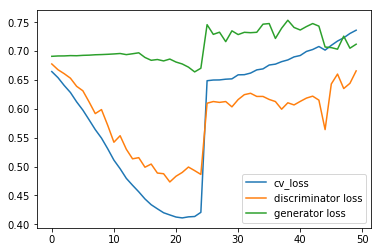

In [ ]:
cgan.plot_learning()

result_cgan = evaluate(y_true=y_test, y_pred=cgan.predict(x=x_test))
generated_one = cgan.generate(number=examples, labels=np.ones(examples))
generated_zero = cgan.generate(number=examples, labels=np.zeros(examples))

In [ ]:
#################
# Classical MLP #
#################
mlp = Mlp(data_dim=data_dim)
d_loss_classical = mlp.train(x_train=x_balanced_train,
                             y_train=y_balanced_train,
                             epochs=epochs*switches)

result_mlp = evaluate(y_true=y_test, y_pred=mlp.predict(x=x_test))
result_mlp_fooling = evaluate(y_true=np.zeros(examples+examples),
                              y_pred=mlp.predict(np.concatenate((generated_one, generated_zero))))

In [ ]:
print("CGAN result")
print(result_cgan)
print("\n"*2 + "MLP result")
print(result_mlp)
print("\n"*2 + "MLP fooled by attacker")
print(result_mlp_fooling)

In [17]:
d_loss_classical = mlp.train(x_train=x_balanced_train,
                             y_train=y_balanced_train,
                             epochs=epochs*switches)

  0%|          | 0/48 [00:00<?, ?it/s]


In [18]:

result_mlp = evaluate(y_true=y_test, y_pred=mlp.predict(x=x_test))

In [20]:
result_cgan

{'accuracy': 0.5345828074269883, 'confusion_matrix': array([[67343,     0],
        [58630,     0]]), 'f1_score': 0.0, 'precision': 0.0, 'recall': 0.0}

In [21]:
mlp.mlp.predict(x_test)

array([[0.50717956],
       [0.51183236],
       [0.5938702 ],
       ...,
       [0.6341873 ],
       [0.5888709 ],
       [0.53216994]], dtype=float32)